In [3]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 51.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=acbdbb0cc9691683152c380fbb509f8733b46890e90f77f49a85e5d66d485dc4
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which 

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [4]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

**Point 1 & 2 Handling Missing Value**

In [ ]:
#import file
import pandas as pd
url = 'https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv'
df = pd.read_csv(url)
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
# identifikasi nilai null dan NA pada dataset --> tidak ada yg NA
df.isna().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [ ]:
# semua baris tidak ada yg null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# cek kolom fraud_reported
df["fraud_reported"].unique()


array(['Y', 'N'], dtype=object)

In [ ]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
# police_report_available seharusnya berisi yes or no, jadi yang nol diganti dengan No
df["police_report_available"] = df["police_report_available"].replace("?","NO")

In [ ]:
df["police_report_available"].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
# cek frequency fraud
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [ ]:
#cek correlation, namun akan kita ubah dulu fraud data menjadi bentuk integer
df["fraud_reported"] = df["fraud_reported"].replace("N",0)
df["fraud_reported"] = df["fraud_reported"].replace("Y",1)
df["fraud_reported"] = df["fraud_reported"].astype(int)

In [ ]:
#police_report_available menjadi bentuk integer
df["police_report_available"] = df["police_report_available"].replace("YES",1)
df["police_report_available"] = df["police_report_available"].replace("NO",0)
df["police_report_available"] = df["police_report_available"].astype(int)

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,Accura,RSX,2009,0


**Point 3 Filter variable Prediktor**

In [ ]:
# dari hasil correlasi, variable yang saling memiliki correlasi tinggi harus dibuang dulu agar tidak mempengaruhi model seperti:
# age dengan months_as_customer, injury_claim, property_claim , vehicle_claim dengan total_claim_amount

df.corr().style.background_gradient(cmap='coolwarm')

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,0.031190,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,-0.012939,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.039256,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.040558,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


In [ ]:
df2 = df.drop(columns=['months_as_customer', 'age', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'policy_number', 'policy_bind_date','property_damage',
       'policy_state','insured_zip','insured_education_level','insured_occupation',
       'insured_hobbies','insured_relationship','insured_occupation','insured_sex','policy_csl','incident_date',
       'auto_make','auto_model','auto_year','incident_state','incident_city','incident_location','collision_type'])

In [ ]:
import seaborn as sns

In [ ]:
df2['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

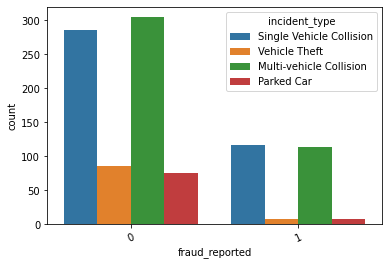

In [ ]:
# incident type antara fraud dan tidak_fraud memiliki distribusi yg sama
fig = plt.figure(figsize= (6,4))
sns.countplot(x=df2["fraud_reported"] , hue = df2["incident_type"] )
plt.xticks(rotation=25)

In [ ]:
df2['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

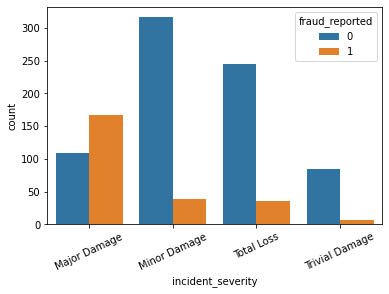

In [ ]:
# sedangkan incident_severity fraud reported banyak di klaim atas kerusakan dengan tingkat keparahan terbanyak di "Major Damage", 
# berbeda dengan yang tidak fraud lebih banyak di "Minor damage", maka dari itu variable ini akan dipilih juga sebgai variabel prediktor
fig = plt.figure(figsize= (6,4))
sns.countplot(x=df2["incident_severity"], hue = df2["fraud_reported"] )
plt.xticks(rotation=25)

In [ ]:
# authorities_contacted juga tidak perlu ditambah ke prediktor
df3 = df2.drop(columns=['incident_type','authorities_contacted'])

In [ ]:
df3.head()

,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,fraud_reported
0,1000,1406.91,0,53300,0,Major Damage,5,1,1,2,1,1
1,2000,1197.22,5000000,0,0,Minor Damage,8,1,0,0,0,1
2,2000,1413.14,5000000,35100,0,Minor Damage,7,3,2,3,0,0
3,2000,1415.74,6000000,48900,-62400,Major Damage,5,1,1,2,0,1
4,1000,1583.91,6000000,66000,-46000,Minor Damage,20,1,0,1,0,0


In [ ]:
# incident_severity kita jadikan data dummy
dummy_severity=pd.get_dummies(df3['incident_severity'])
dummy_severity

,Major Damage,Minor Damage,Total Loss,Trivial Damage
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
995,0,1,0,0
996,1,0,0,0
997,0,1,0,0
998,1,0,0,0


In [ ]:
# gabungkan dummy_severity dengan df3

df4 = pd.concat([df3, dummy_severity], axis = 1)

In [ ]:
df4 = df4.drop(columns = ["incident_severity"])
df4.head()

,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,fraud_reported,Major Damage,Minor Damage,Total Loss,Trivial Damage
0,1000,1406.91,0,53300,0,5,1,1,2,1,1,1,0,0,0
1,2000,1197.22,5000000,0,0,8,1,0,0,0,1,0,1,0,0
2,2000,1413.14,5000000,35100,0,7,3,2,3,0,0,0,1,0,0
3,2000,1415.74,6000000,48900,-62400,5,1,1,2,0,1,1,0,0,0
4,1000,1583.91,6000000,66000,-46000,20,1,0,1,0,0,0,1,0,0


**Point 4  model machine learning dengan regresi logistik dan KNN sebagai baseline dari model, lalu random forest dan XgBoost sebagai model lanjutan**

Train test Split

In [ ]:
# assign 'FraudCheck' column to y 
y = df4['fraud_reported'].values

# assign all columns except 'FraudCheck' to X
X = df4.drop(['fraud_reported'], axis = 1).values


In [ ]:
# check y dimension
y.shape

(1000,)

In [ ]:
# check x dimension
X.shape

(1000, 14)

In [ ]:
# Karena variabel targetnya kategorik maka perlu parameter stratify agar distribusi variabel target sama antara sebelum dan sesudah di sampling
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split( X,y, test_size = 0.3, stratify = y, random_state = 1000, )

In [ ]:
# Check X_train_churn dimension
X_train_fraud.shape

(700, 14)

In [ ]:
# check y_train_churn class distribution
np.unique(y_train_fraud.shape, return_counts=True)[1]


array([1])

In [ ]:
# check X_test_churn dimension
X_test_fraud.shape

(300, 14)

In [ ]:
# check y_test_fraud class distribution
np.unique(y_test_fraud.shape, return_counts=True)[1]


array([1])

Logistics Regression

In [ ]:
# Logistics Regression
X_train_int = sm.add_constant(X_train_fraud)
# define and fit model to data
logistic_reg_sm = sm.Logit(y_train_fraud, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.427379
         Iterations 7


In [ ]:
# check summary of model => jika dilihat dari coef dan nilai p value maka variabel yang sangat kuat pengaruhnya yaitu X11(tipe keparahan: Mayor Damage)
logistic_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                          Logit   Df Residuals:                      686
Method:                           MLE   Df Model:                           13
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.2357
Time:                        08:17:30   Log-Likelihood:                -299.17
converged:                       True   LL-Null:                       -391.42
Covariance Type:            nonrobust   LLR p-value:                 2.033e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9694   9.31e+06  -1.04e-07      1.000   -1.82e+07    1.82e+07
x1             0.0001      0.000      0.800      0.424      -0.000       0.000
x2            -0.0007      0.000     -1.526      0.127      -0.001       0.000
x3          1.001e-07   4.27e-08      2.345      0.019    1.64e-08    1.84e-07
x4         -3.115e-06   3.71e-06     -0.839      0.402   -1.04e-05    4.16e-06
x5         -4.697e-06   3.71e-06     -1.265      0.206    -1.2e-05    2.58e-06
x6             0.0034      0.015      0.230      0.818      -0.026       0.032
x7            -0.0684      0.104     -0.657      0.511      -0.272       0.136
x8             0.1423      0.127      1.125      0.261      -0.106       0.390
x9             0.0211      0.094      0.224      0.823      -0.163       0.205
x10           -0.0671      0.226     -0.297      0.767      -0.511       0.377
x11            1.9091   9.31e+06   2.05e-07      1.000   -1.82e+07    1.82e+07
x12           -0.7263   9.31e+06   -7.8e-08      1.000   -1.82e+07    1.82e+07
x13           -0.3945   9.31e+06  -4.24e-08      1.000   -1.82e+07    1.82e+07
x14           -1.7577   9.31e+06  -1.89e-07      1.000   -1.82e+07    1.82e+07
==============================================================================
"""

In [ ]:
# check model coefficient
logistic_reg_sm.params

array([-9.69434800e-01,  1.34658272e-04, -6.50833813e-04,  1.00056722e-07,
       -3.11517466e-06, -4.69724933e-06,  3.41347701e-03, -6.83714514e-02,
        1.42340228e-01,  2.10565091e-02, -6.71315453e-02,  1.90911136e+00,
       -7.26312053e-01, -3.94542021e-01, -1.75769383e+00])

In [ ]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train_fraud, y_train_fraud)

LogisticRegression(random_state=1000)

In [ ]:
# check model coefficient
logistic_reg.coef_

array([[-2.69630972e-05, -8.95279922e-04,  6.16025647e-08,
        -2.95098022e-06, -1.60052163e-06, -3.57732429e-06,
        -2.12804906e-08, -2.30969812e-07, -4.81850393e-07,
        -1.44557472e-07,  2.66669525e-06, -1.73774579e-06,
        -9.51242943e-07, -6.40148493e-07]])

In [ ]:
# check the intercept
logistic_reg.intercept_

array([-6.62441986e-07])

In [ ]:
# Check result ==> akurasi nya masih kurang bagus hanya 75% saja 
pred_result = logistic_reg.predict(X_test_fraud)
pred_proba_result = logistic_reg.predict_proba(X_test_fraud)
pd.DataFrame(metrics.classification_report(y_test_fraud, pred_result, target_names=['Not Fraud','Fraud'], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.753333,0.0,0.753333,0.376667,0.567511
recall,1.000000,0.0,0.753333,0.500000,0.753333
f1-score,0.859316,0.0,0.753333,0.429658,0.647351
support,226.000000,74.0,0.753333,300.000000,300.000000


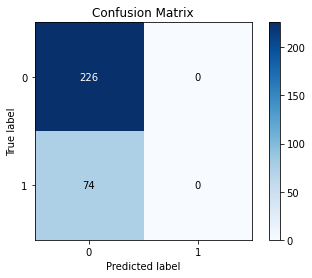

In [ ]:
# check confusion matrix => Jumlah data test 300, Nilai True 0 = Tidak fraud= 226 data, sedangkan True 1 = Fraud nya nol. 
# Padahal kita ingin mencari nilai True positif (1 adalah fraud ) 
skplt.metrics.plot_confusion_matrix(y_test_fraud, pred_result);

Random Forest

In [ ]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree
# import xgboost classifier
from xgboost import XGBClassifier

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5



In [ ]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 1000,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train_fraud, y_train_fraud)

RandomForestClassifier(random_state=1000)

In [ ]:
# random forest prediction
rf_pred = random_forest_clf.predict(X_test_fraud)
rf_pred_proba = random_forest_clf.predict_proba(X_test_fraud)

In [ ]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test_fraud, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.856522,0.585714,0.793333,0.721118,0.789723
recall,0.871681,0.554054,0.793333,0.712868,0.793333
f1-score,0.864035,0.569444,0.793333,0.716740,0.791369
support,226.000000,74.000000,0.793333,300.000000,300.000000


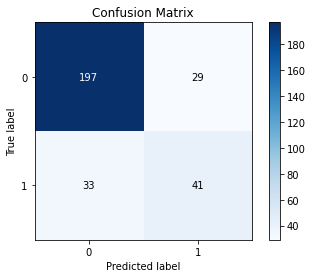

In [ ]:
# check confusion matrix => Jumlah data test 300, Nilai True 0 = Tidak fraud= 197 data, sedangkan True 1 = Fraud 41 data
# nilai akurasi random forest lebih tinggi regresi logistic yaitu 79%
skplt.metrics.plot_confusion_matrix(y_test_fraud, rf_pred);

XGBoost Classifier

In [ ]:
# fit model no training data
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train_fraud, y_train_fraud)

XGBClassifier(random_state=1000)

In [ ]:
# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test_fraud)
xgb_pred_proba = xgb_clf.predict_proba(X_test_fraud)

In [ ]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test_fraud, xgb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.865471,0.571429,0.79,0.718450,0.792940
recall,0.853982,0.594595,0.79,0.724288,0.790000
f1-score,0.859688,0.582781,0.79,0.721235,0.791385
support,226.000000,74.000000,0.79,300.000000,300.000000


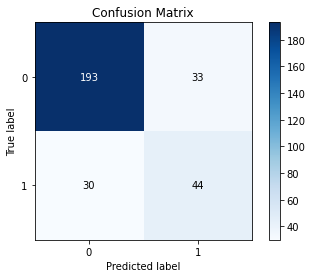

In [ ]:
# check confusion matrix => Jumlah data test 300, Nilai True 0 = Tidak fraud= 197 data, sedangkan True 1 = Fraud 41 data
# nilai akurasi random forest lebih tinggi regresi logistic yaitu 79%
skplt.metrics.plot_confusion_matrix(y_test_fraud, xgb_pred);